## Autores:

Luiza Lober de Souza Piva, nUSP: 9302292

Ricardo Camacho Tetti, nUSP: 10728098

Todos os dados também estão disponíveis em: [https://github.com/luizalober/doc-disciplinas/tree/main/redes-comp-2s2022/p1](https://github.com/luizalober/doc-disciplinas/tree/main/redes-comp-2s2022/p1)

In [ ]:
!pip install python-louvain   #para o método Louvain utilizado na Q1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Configurações
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import time
import random 

#Ignora alguns avisos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

#puxar arquivos do GitHub
import requests as rq
from io import BytesIO

#Q1: métodos de detecção
from networkx.algorithms.community import greedy_modularity_communities
from community import community_louvain

#Redes que serão utilizadas neste trabalho

## Rede 1: Rede de confiança de médicos

Uma rede que mostra as relações de confiança entre médicos de quatro cidades do meio-oeste dos Estados Unidos. As direções indicam que um dado nó *i* confia ou pede conselhos para um nó *j*.

Descrição do arquivo:

*    241 vértices/nós (médicos);
*    1098 conexões/arestas (confiança);
*    Não há loops;
*    Rede com pesos (weighted), **com direção**.

Rede disponível em https://downloads.skewed.de/mirror/konect.cc/files/download.tsv.moreno_innovation.tar.bz2

Mais informações: http://www.jstor.org/stable/2785979

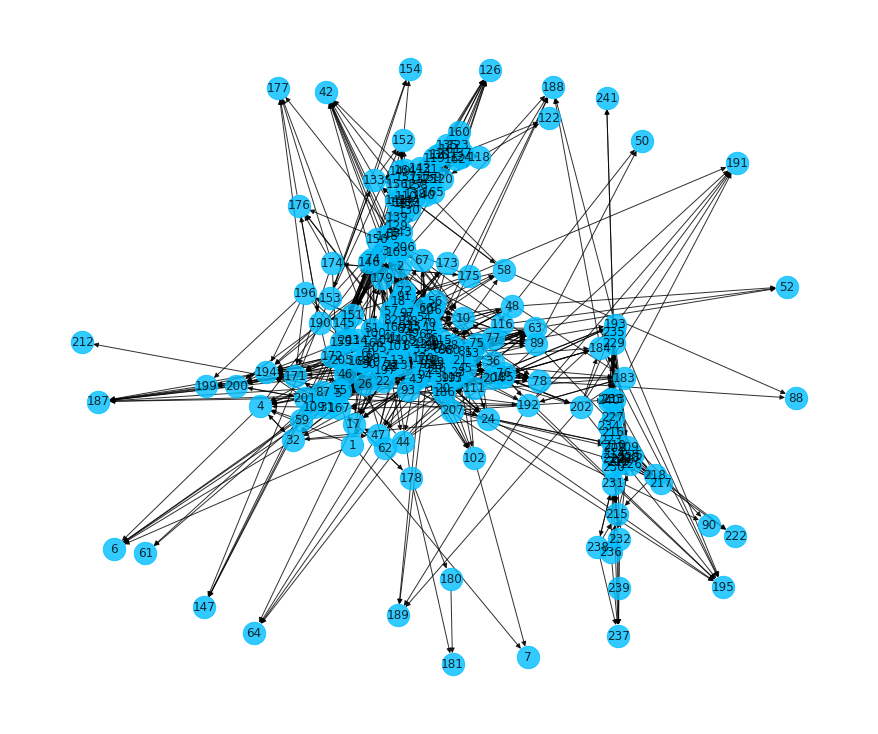

In [ ]:
#Lê o grafo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/out.moreno_innovation_innovation.txt'
data = rq.get(url).content
G1 = nx.read_edgelist(BytesIO(data), create_using=nx.DiGraph())

#Grafica a representação gráfica do grafo G1
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color="deepskyblue", node_size=500, with_labels=True, alpha=0.8)

In [ ]:
#Precisamos converter essa rede para não direcionada, remover autoloops e 
#deixar os rótulos inteiros para poder usar os algoritmos de partição.
G1_modif = G1.to_undirected()
G1_modif.remove_edges_from(nx.selfloop_edges(G1_modif))
Gcc_1 = sorted(nx.connected_components(G1_modif), key=len, reverse=True)
G1_modif = G1_modif.subgraph(Gcc_1[0])
G1_modif = nx.convert_node_labels_to_integers(G1_modif, first_label=0)    

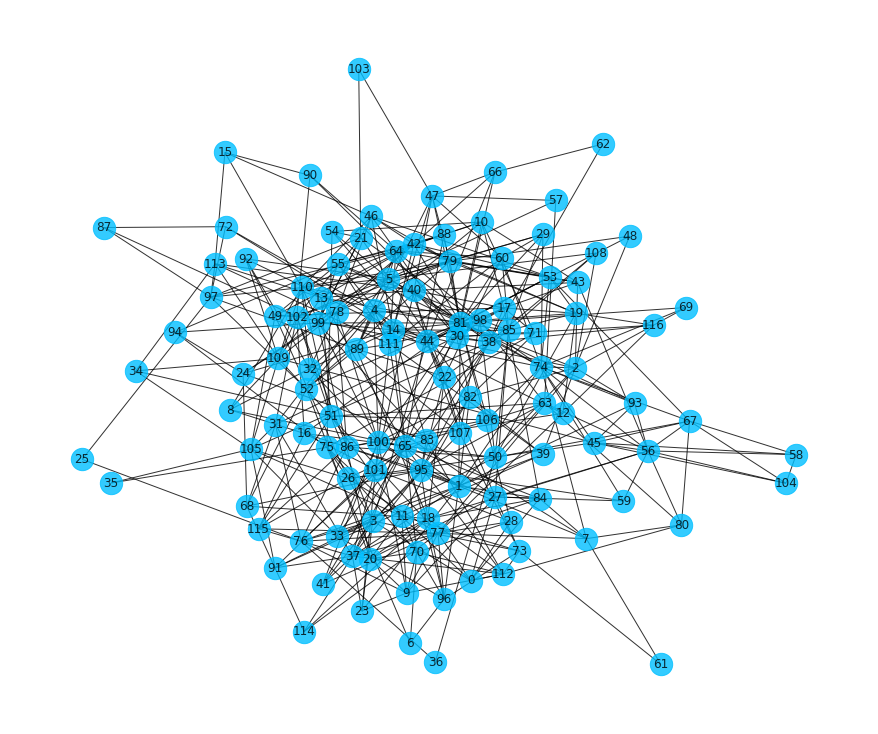

In [ ]:
#Grafica a rede 1 com as modificações anteriores
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G1_modif)
nx.draw(G1_modif, pos, node_color="deepskyblue", node_size=500, with_labels=True, alpha=0.8)

## Rede 2: Centrality literature network

Uma rede descrevendo citações dentro do assunto "centralidade em ciência de redes complexas" dos anos 1948 a 1979.

Descrição do arquivo:

*   129 vértices/nós (publicações);
*   613 conexões/arestas (citações apontando para o artigo citado);
*   Não há loops;
*   Rede com pesos (weighted)
*   Valores das linhas: 
   *  1 - citações simples, 
   *  2 - citações duplas, o que é possível se o artigo citado ou que faz a citação se refere a dois artigos combinados em um único vértice


Rede disponível em [http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm](http://vlado.fmf.uni-lj.si/pub/networks/data/esna/centrality.htm)

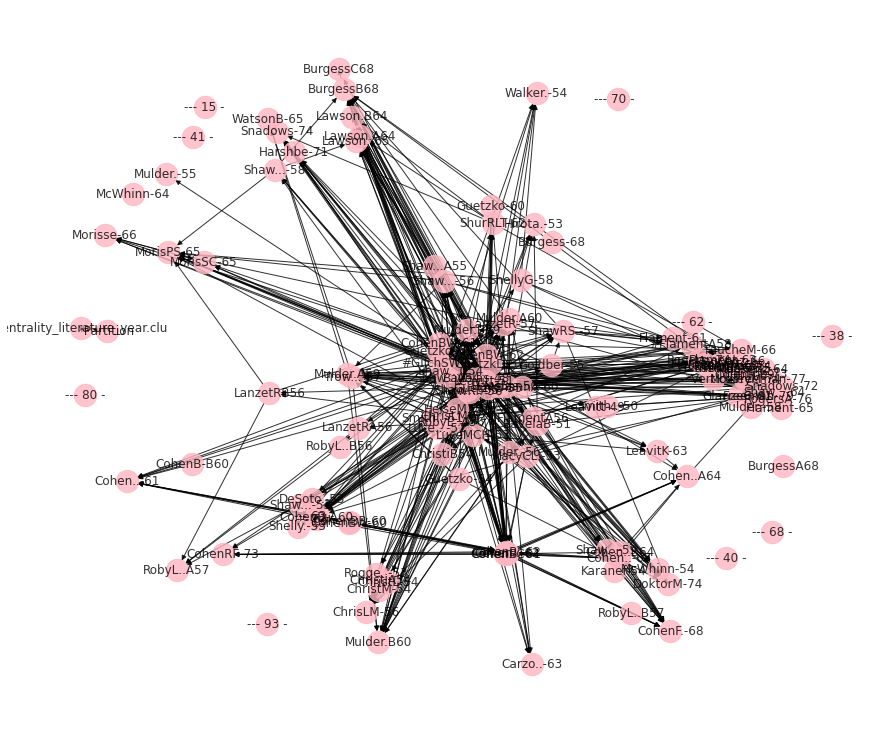

In [ ]:
 #Lê a rede
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/data/trab-1/centrality_literature.paj'
data = rq.get(url).content
G2= nx.read_pajek(BytesIO(data))

#Grafica a representação gráfica do grafo G2
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, node_color="lightpink", node_size=500, with_labels=True, alpha=0.8)

In [ ]:
#Precisamos converter essa rede para não direcionada, remover autoloops e 
#deixar os rótulos inteiros para poder usar os algoritmos de partição.
G2_modif = G2.to_undirected()
G2_modif.remove_edges_from(nx.selfloop_edges(G2_modif))
Gcc_2 = sorted(nx.connected_components(G2_modif), key=len, reverse=True)
G2_modif = G2_modif.subgraph(Gcc_2[0])
G2_modif = nx.convert_node_labels_to_integers(G2_modif, first_label=0)    

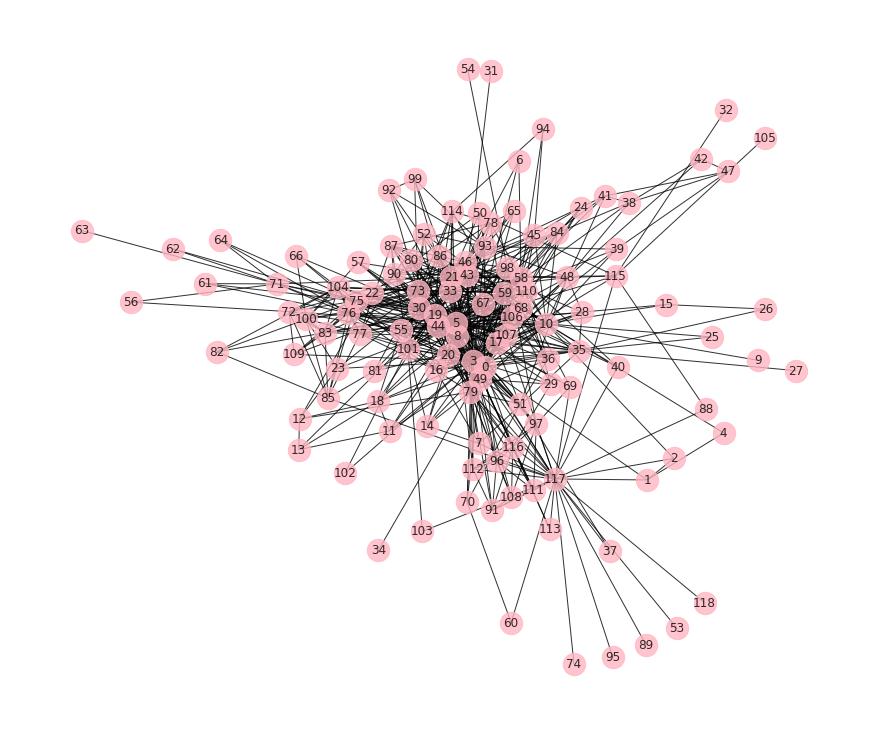

In [ ]:
#Grafica a rede 2 com as modificações anteriores
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G2_modif)
nx.draw(G2_modif, pos, node_color="lightpink", node_size=500, with_labels=True, alpha=0.8)

## Rede 3: Rede de amizade pelo Facebook na Caltech

Essa rede mostra as conexões de amizade no Facebook de pessoas da universidade de Caltech

Descrição do arquivo:

*   769 vértices/nós (publicações);
*   16700 conexões/arestas (citações apontando para o artigo citado);
  * Note que esta rede é considerávelmente mais densa que as outras duas.
*   Não há loops;
*   Rede sem pesos e sem direção.


Rede dispo https://networkrepository.com/socfb-Caltech36.php

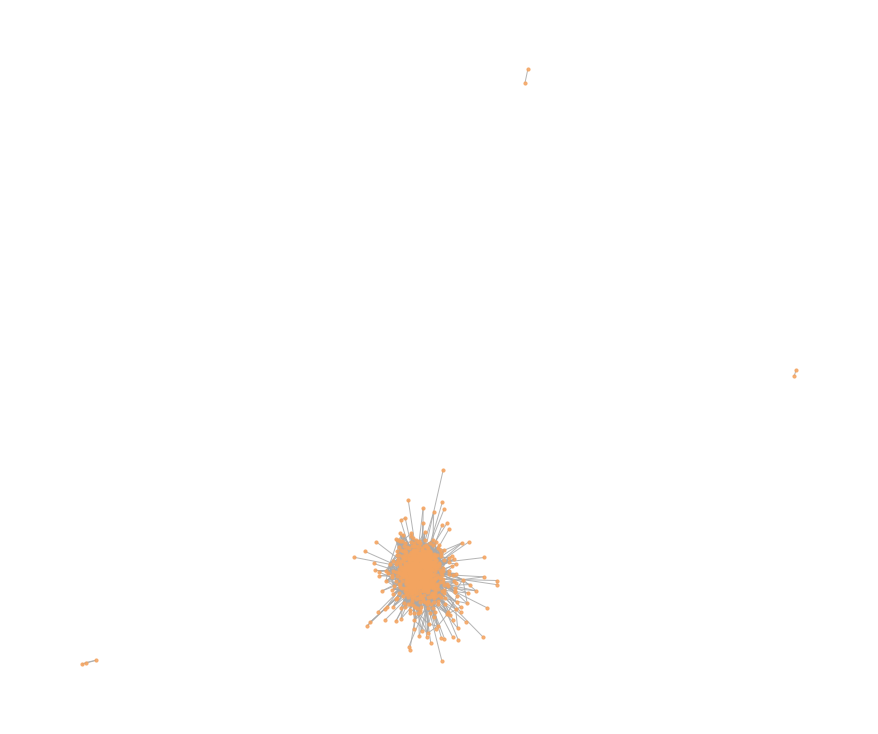

In [ ]:
#Lê o grafo
url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/p1/dados/socfb-Caltech36/socfb-Caltech36.mtx'
data = rq.get(url).content
G3 = nx.read_edgelist(BytesIO(data), comments='%', create_using=nx.Graph())

#Grafica a representação gráfica do grafo G3
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, node_color="sandybrown", node_size=10, with_labels=False, alpha=0.85, edge_color='darkgray')

O tamanho dos nós e as legendas foram omitidas aqui por clareza.

In [ ]:
#Precisamos converter essa rede para não direcionada, remover autoloops e 
#deixar os rótulos inteiros para poder usar os algoritmos de partição.
G3_modif = G3
G3_modif.remove_edges_from(nx.selfloop_edges(G3_modif))
Gcc_3 = sorted(nx.connected_components(G3_modif), key=len, reverse=True)
G3_modif = G3_modif.subgraph(Gcc_3[0])
G3_modif = nx.convert_node_labels_to_integers(G3_modif, first_label=0)   

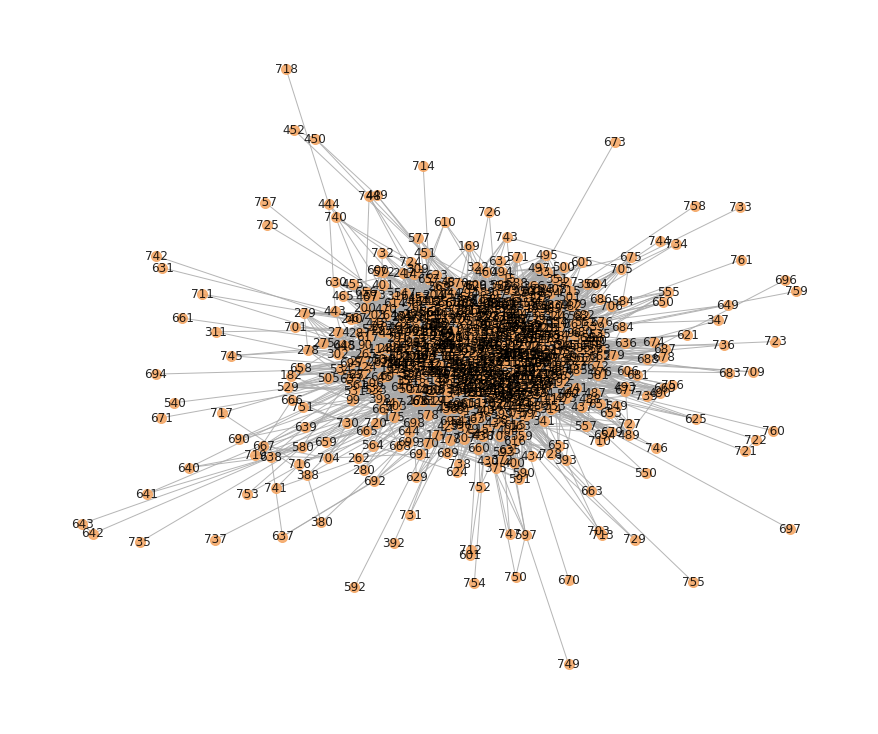

In [ ]:
#Grafica a rede 3 com as modificações anteriores
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G3_modif)
nx.draw(G3_modif, pos, node_color="sandybrown", node_size=100, with_labels=True, alpha=0.85, edge_color='darkgray')

## Rede do clube de karatê de Zachary

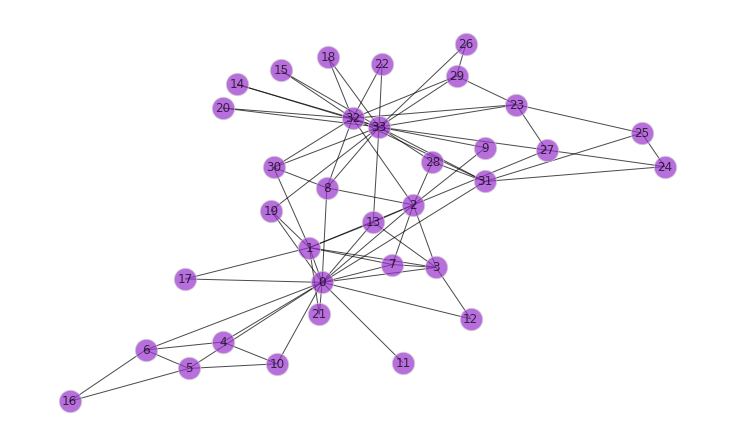

In [ ]:
#Importando a rede do Zachary's karate club

url = 'https://raw.githubusercontent.com/luizalober/doc-disciplinas/main/redes-comp-2s2022/p1/dados/zachary.txt'
data = rq.get(url).content
G_zac = nx.read_edgelist(BytesIO(data), nodetype=int)

#Grafica a representação gráfica do grafo G_zac
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G_zac)
nx.draw(G_zac, pos, node_color="darkorchid", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

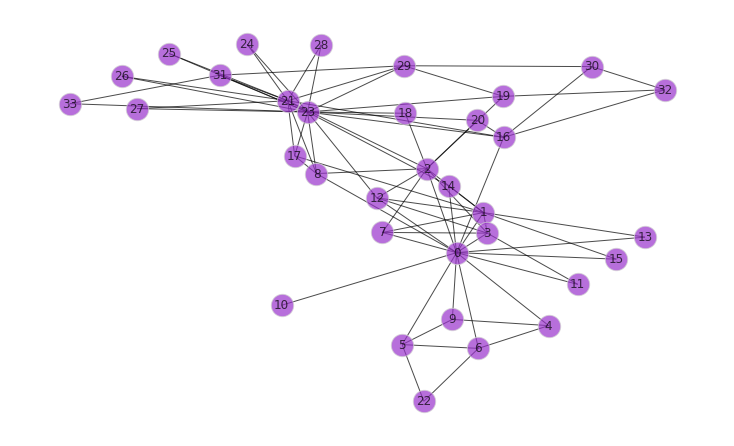

In [ ]:
#Faz as mesmas modificações das outras três redes
G_zac_modif = G_zac 
nodes_original = G_zac.nodes
G_zac_modif = G_zac_modif.to_undirected()
G_zac_modif.remove_edges_from(nx.selfloop_edges(G_zac_modif))
Gcc = sorted(nx.connected_components(G_zac_modif), key=len, reverse=True)
G_zac_modif = G_zac_modif.subgraph(Gcc[0])
G_zac_modif = nx.convert_node_labels_to_integers(G_zac_modif, first_label=0)

#Grafica a rede do clube de karatê com as modificações
pos=nx.spring_layout(G_zac_modif)
fig= plt.figure(figsize=(10,6))
nx.draw(G_zac_modif, pos=pos, node_color = 'darkorchid', node_size=500, with_labels = True, edgecolors= 'lightgray', alpha=0.7)
plt.show(True)

# Q1. Comunidades

## Métodos

Iremos utilizar os métodos de [Louvain](https://en.wikipedia.org/wiki/Louvain_method), [Girvan-Newman](https://en.wikipedia.org/wiki/Girvan%E2%80%93Newman_algorithm) e [Clauset-Newman-Moore](https://arxiv.org/abs/cond-mat/0408187) para a identificação de comunidades das redes mostradas acima. Nas seções seguintes, antes dos ítens das provas, utilizamos a rede do clube de karatê de Zachary para demonstrar os resultados de cada método.

Por conta do método Louvain ser melhor otimizado, vamos utilizar o número de comunidades identificadas por ele para configurar e comparar as partições do método de Girvan-Newman para estas redes.

### Louvain

A definição do algoritmo pode ser encontrada em [[1]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities), assim como os artigos que definem o algoritmo.

Ele se baseia na otimização da modularidade entre comunidades de uma rede.

In [ ]:
def PlotCommunitiesLouvain(rede):
  '''
  Faz o gráfico das comunidades segundo o algoritmo de Louvain
  '''
  particoes = community_louvain.best_partition(rede)

  fig= plt.figure(figsize=(12,8))
  
  size = int(len(set(particoes.values())))
  print('Número de comunidades identificadas: ', size)
  colors = sns.color_palette("hls", int(size+1))  #cria o número de cores baseado no número de partições
  colors=np.array(colors)

  count = 0
  pos=nx.spring_layout(rede)
  comunidades = []
  for com in set(particoes.values()) :
      count = count + 1.
      list_nodes = [nodes for nodes in particoes.keys() if particoes[nodes] == com]
      comunidades.append(list_nodes)
      nx.draw_networkx_nodes(rede, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
  nx.draw_networkx_edges(rede, pos, alpha=0.5)
  plt.show()

  return comunidades

Número de comunidades identificadas:  4


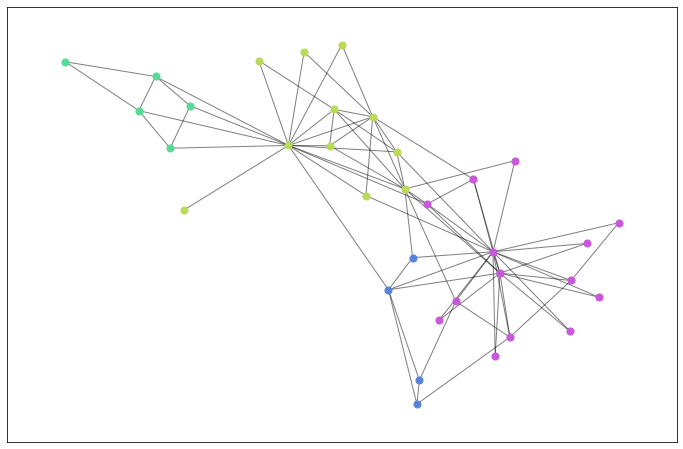

In [ ]:
#Demonstra o resultado para a rede do clube de karatê
comms_zac_louv = PlotCommunitiesLouvain(G_zac_modif)

### Girvan-Newman

A definição deste método se encontra em [[2]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman), assim como os artigos que definem o algoritmo.

Ele se baseia em encontrar comunidades ao progressivamente remover conexões entre os nós, selecionando o nó para aplicar essa remoção que possua maior valor de betweenneess centrality.

In [ ]:
#Plotting the communities with different colors.

def PlotCommunitiesGN(rede, k):
  '''
  Aplica o método de detecção de comunidades de Grivan-Newman para uma dada rede
  e também calcula as comunidades para um alcance k dado.
  '''
  communities = nx.algorithms.community.centrality.girvan_newman(rede)

  #Calcula as comunidades no nível k
  for i in range(0, k):
      next_level_communities = next(communities)
  c = sorted(map(sorted, next_level_communities))   #guarda os valores das comunidades em cada nível.

  size = int(len(c))
  colors = sns.color_palette("hls", size+1)  #cria o número de cores baseado no número de partições
  colors=np.array(colors)

  pos=nx.spring_layout(rede)
  fig= plt.figure(figsize=(10,6))
  nx.draw(rede, pos=pos, node_color = 'white', edge_color='lightgray')
  aux = 0
  
  for cm in c:
      nx.draw(rede.subgraph(cm), pos=pos, node_color = colors[int(aux)], 
                      with_labels = False, node_size=100)
      aux = aux + 1
  plt.show()

  return c

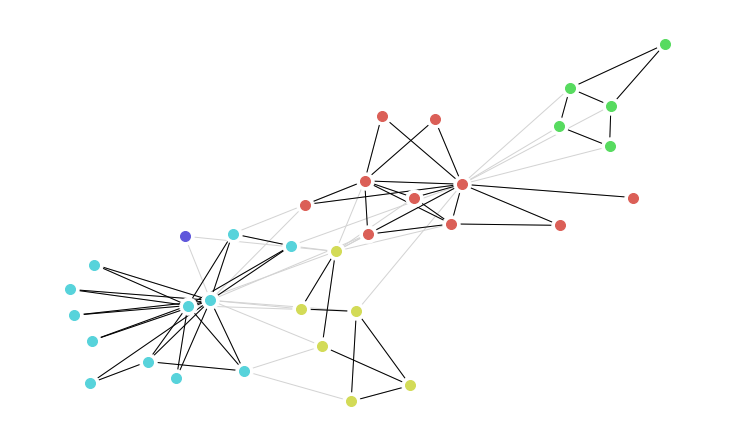

In [ ]:
#Demonstra o resultado para a rede do clube de karatê
comms_zac_GN = PlotCommunitiesGN(G_zac_modif, k=4)

### Clauset-Newman-Moore (greedy)

Assim como o método de Louvain, este também se baseia na modularidade, maximizando iterativamente o valor dessa medida para encontrar comunidades. As referências para este algoritmo estão em [[3]](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html#networkx.algorithms.community.modularity_max.greedy_modularity_communities).


Uma comparação entre estes dois métodos baseados em modularidade pode ser encontrada em [[4]](https://arxiv.org/abs/0803.0476).


In [ ]:
def PlotCommunitiesGreedy(rede):
  '''
  Aplica o método de detecção de comunidades Greedy para uma dada rede
  e também faz o gráfico das mesmas.
  '''
  #calcula as comunidades pelo método Greedy
  comunidades = list(greedy_modularity_communities(rede))

  size = int(len(comunidades))
  print('Número de comunidades identificadas: ', size)
  colors = sns.color_palette("hls", size+1)  #cria o número de cores baseado no número de partições
  colors=np.array(colors)

  fig= plt.figure(figsize=(10,6))
  pos=nx.spring_layout(rede)

  nx.draw(rede, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
  aux = 0
  for cm in comunidades:
      nx.draw(rede.subgraph(cm), pos, node_color = colors[int(aux)], 
                      with_labels = False, node_size=100)
      aux = aux + 1
  plt.show(True)

  return comunidades

Número de comunidades identificadas:  3


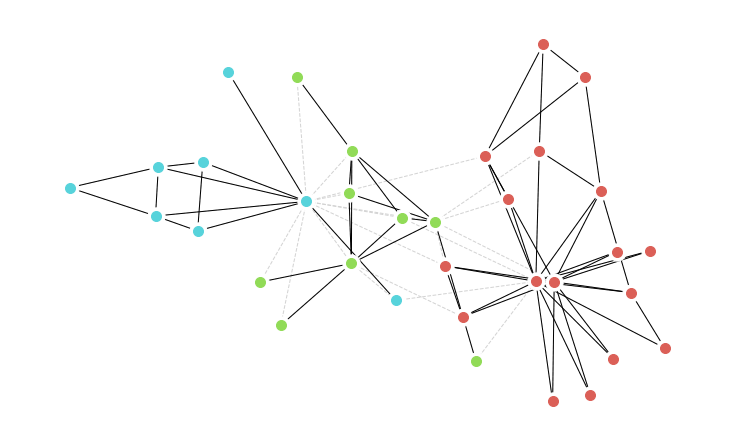

In [ ]:
#Demonstra o resultado para a rede do clube de karatê
comms_zac_greedy = PlotCommunitiesGreedy(G_zac_modif)

## a), b) Comunidades identificadas e número de comunidades

### Rede 1

Número de comunidades identificadas:  6


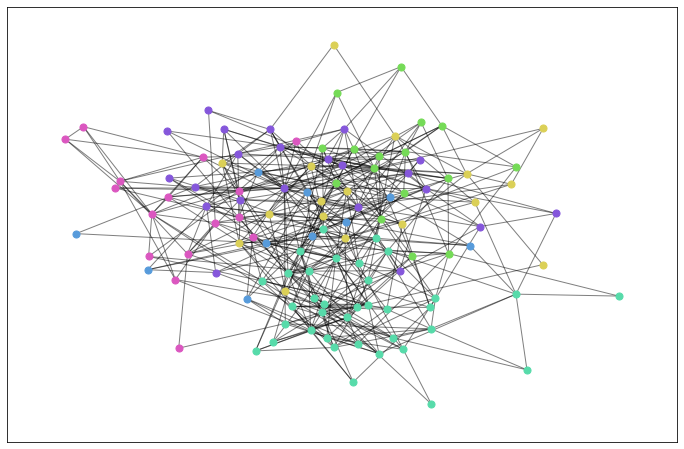

In [ ]:
comms_G1_louv = PlotCommunitiesLouvain(G1_modif)

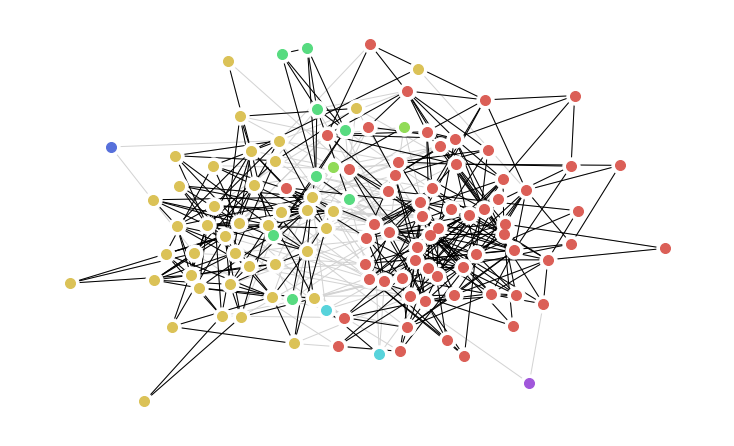

In [ ]:
#k=6 significa fazer 6 particionamentos, ou encontrar 6 comunidades.
comms_G1_GN = PlotCommunitiesGN(G1_modif, k=6)

Número de comunidades identificadas:  4


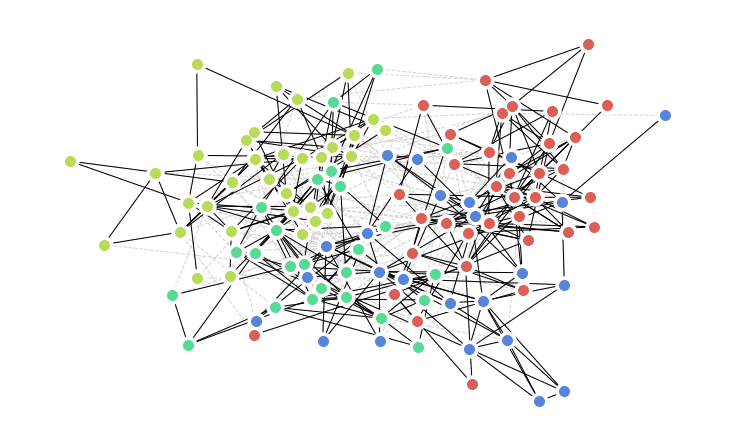

In [ ]:
comms_G1_greedy = PlotCommunitiesGreedy(G1_modif)

### Rede 2

Número de comunidades identificadas:  6


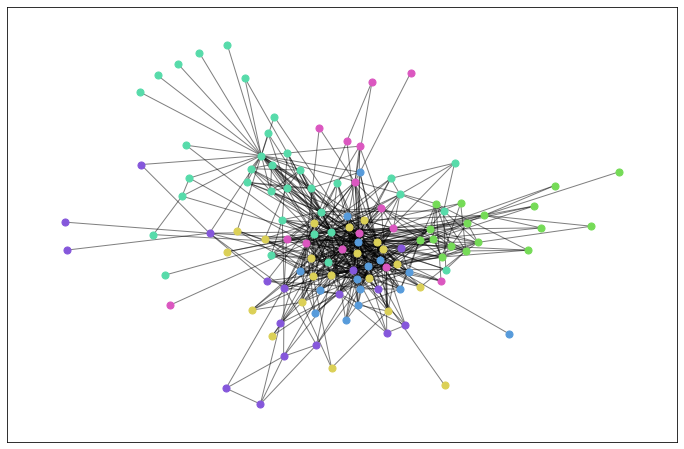

In [ ]:
comms_G2_louv = PlotCommunitiesLouvain(G2_modif)

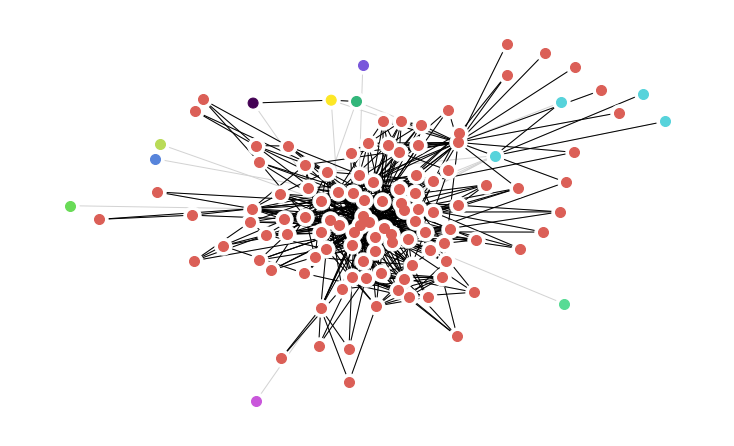

In [ ]:
#k=8 significa fazer 6 particionamentos, ou encontrar 8 comunidades.
comms_G2_GN = PlotCommunitiesGN(G2_modif, k=8)

Número de comunidades identificadas:  6


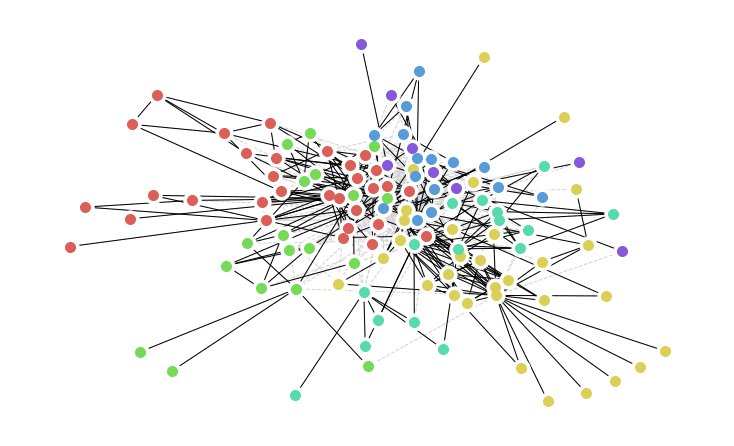

In [ ]:
comms_G2_greedy = PlotCommunitiesGreedy(G2_modif)

### Rede 3

Número de comunidades identificadas:  7


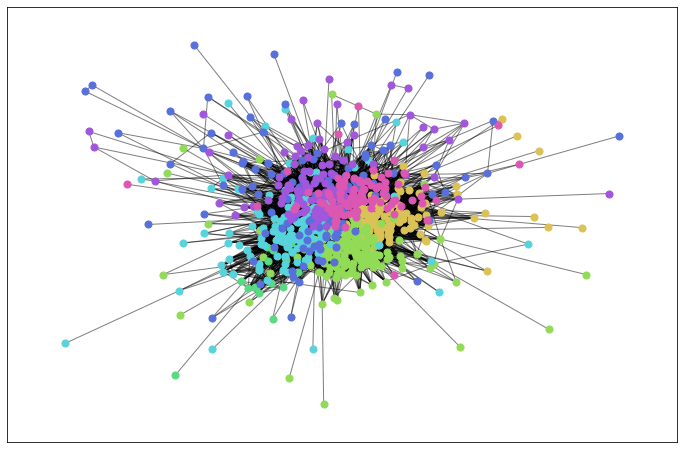

In [ ]:
comms_G3_louv = PlotCommunitiesLouvain(G3_modif)

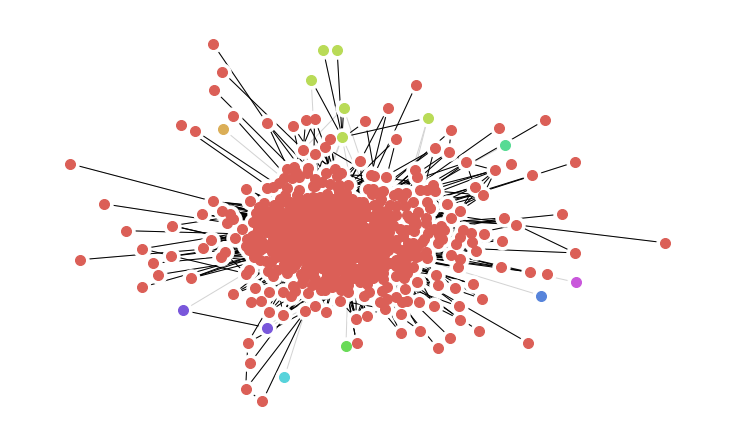

In [ ]:
#k=8 significa fazer 6 particionamentos, ou encontrar 8 comunidades.
comms_G3_GN = PlotCommunitiesGN(G3_modif, k=8)

Número de comunidades identificadas:  8


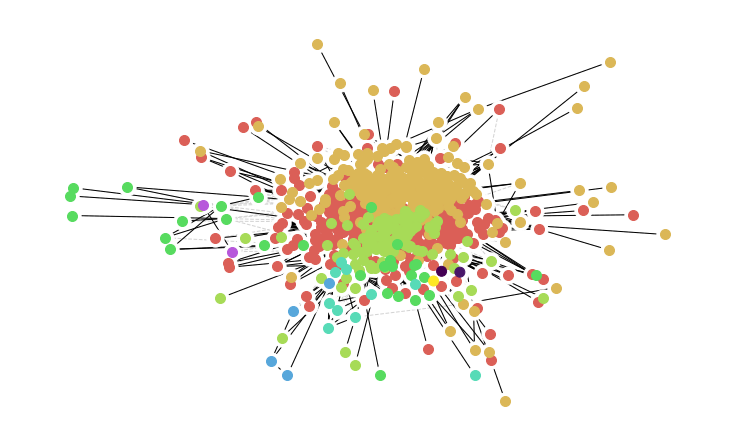

In [ ]:
comms_G3_greedy = PlotCommunitiesGreedy(G3_modif)

## c) Modularidade calculada e interpretação

In [ ]:
#A função abaixo implementa o cálculo de modularidade
def Modularidade(G, mapa_comunidades):
  '''
  Calcula a modularidade através do mapa de comunidades gerado para cada método.
  '''

  #inicia o relógio. Queremos comparar a eficiência de cada método através da modularidade
  total_time = 0
  start = time.time()

  #Cria as variáveis para o cálculo
  A = nx.adjacency_matrix(G)
  N = len(G)
  M = G.number_of_edges()
  Q = 0

  #Organiza as listas do mapa de comunidade de forma a aplicar o cálculo de modularidade
  nc=0
  communities = np.zeros(len(G.nodes()))
  for k in range(0,len(mapa_comunidades)):
    communities[sorted(mapa_comunidades[k])]=nc
    nc = nc+1

  #calcula a modularidade
  for i in np.arange(0,N):
    ki = len(list(G.neighbors(i)))
    for j in np.arange(0,N):
      if(communities[i]==communities[j]):
        kj = len(list(G.neighbors(j)))
        Q = Q + A[i,j]-(ki*kj)/(2*M)
  Q = Q/(2*M)
  
  #finaliza a contagem de tempo
  end = time.time()
  total_time = end - start

  return Q, total_time

In [ ]:
#Rede 1
M1, t1 = Modularidade(G1_modif, comms_G1_louv)
M2, t2 = Modularidade(G1_modif, comms_G1_GN)
M3, t3 = Modularidade(G1_modif, comms_G1_greedy)

print('--- Rede 1 ---')
print('Modularidade utilizando Louvain: ', M1, '. Tempo de cálculo: ', t1)
print('Modularidade utilizando Girvan-Newman: ', M2, '. Tempo de cálculo: ', t2 )
print('Modularidade utilizando Greedy: ', M3, '. Tempo de cálculo: ', t3 )

#Rede 2
M1, t1 = Modularidade(G2_modif, comms_G2_louv)
M2, t2 = Modularidade(G2_modif, comms_G2_GN)
M3, t3 = Modularidade(G2_modif, comms_G2_greedy)

print('--- Rede 2 ---')
print('Modularidade utilizando Louvain: ', M1, '. Tempo de cálculo: ', t1)
print('Modularidade utilizando Girvan-Newman: ', M2, '. Tempo de cálculo: ', t2 )
print('Modularidade utilizando Greedy: ', M3, '. Tempo de cálculo: ', t3 )

#Rede 3
M1, t1 = Modularidade(G3_modif, comms_G3_louv)
M2, t2 = Modularidade(G3_modif, comms_G3_GN)
M3, t3 = Modularidade(G3_modif, comms_G3_greedy)

print('--- Rede 3 ---')
print('Modularidade utilizando Louvain: ', M1, '. Tempo de cálculo: ', t1)
print('Modularidade utilizando Girvan-Newman: ', M2, '. Tempo de cálculo: ', t2 )
print('Modularidade utilizando Greedy: ', M3, '. Tempo de cálculo: ', t3 )

--- Rede 1 ---
Modularidade utilizando Louvain:  0.402890507573131 . Tempo de cálculo:  0.06862831115722656
Modularidade utilizando Girvan-Newman:  0.31443403861718205 . Tempo de cálculo:  0.15274381637573242
Modularidade utilizando Greedy:  0.38320961960920447 . Tempo de cálculo:  0.1623857021331787
--- Rede 2 ---
Modularidade utilizando Louvain:  0.3142433871977395 . Tempo de cálculo:  0.07207894325256348
Modularidade utilizando Girvan-Newman:  0.03839828539294839 . Tempo de cálculo:  0.2849104404449463
Modularidade utilizando Greedy:  0.2787536207280691 . Tempo de cálculo:  0.07032632827758789
--- Rede 3 ---
Modularidade utilizando Louvain:  0.39330488886685744 . Tempo de cálculo:  2.8117501735687256
Modularidade utilizando Girvan-Newman:  0.0008392430353515425 . Tempo de cálculo:  14.304571151733398
Modularidade utilizando Greedy:  0.3148612984295831 . Tempo de cálculo:  5.474201440811157


Dos resultados acima, podemos concluir que redes diferentes podem ser utilizadas como um teste de eficiência dos métodos através da modularidade: a rede 3, mais densa (maior número de conexões), apresentou tempos de cálculo significativamente maiores do que as outras duas, que tiveram tempos similares. Nela, o método de Louvain se provou o mais eficiente dos três, seguido pelo Greedy e por fim pelo Girvan-Newman.

Utilizar redes densas como um teste de eficiência é interessante pois os algoritmos precisam realizar uma quantidade consideravelmente maior de cálculos para elas. Se um é finalizado em tempos menores que os outros, ele portanto será mais eficiente.

## d) Similaridade

Este tipo de similaridade entre partições pode ser calculado a partir do algoritmo [`graph_edit_distance()`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.similarity.graph_edit_distance.html#networkx.algorithms.similarity.graph_edit_distance), que retorna o número de alterações que devem ser feitas em uma dada partição da rede 1 de forma a encontrar um resultado isomorfo à rede 2 (distância 0).

In [ ]:
#Abaixo, define duas funções: uma para gerar um subgrafo correspondente à uma dada
#-> partição/comunidade da rede original; e outra função para graficar essa partição

def GeraSubgrafo(rede, comunidades):
  '''
  Gera um subgrafo a partir de uma dada rede e um conjunto de nós.
  Esta função pode ser utilizada para gerar partições de comunidades.
  '''
  #trata "comunidades", a lista de nós geradas pelos métodos, como um subgrafo
  sub = nx.subgraph(rede, comunidades)
  subgrafo = nx.Graph(sub)
  subgrafo = nx.convert_node_labels_to_integers(subgrafo, ordering = 'decreasing degree')

  return subgrafo

def GraficaSubgrafo(subgrafo, comunidades, posicao_comm):
  plt.figure(figsize=(10,6))
  pos = nx.spring_layout(subgrafo)

  size = len(comunidades)
  #coloca a cor assim como está na questão 1.a), para uma comparação visual mais fácil.
  colors = sns.color_palette("hls", int(size+1))  #cria o número de cores baseado no número de partições
  colors=np.array(colors)

  nx.draw(subgrafo, pos, node_color=colors[posicao_comm], node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)
  plt.show()

In [ ]:
def TestaSimilaridade(rede, comunidade):
  '''
  Mostra o número de alterações que devem ser feitas num subgrafo
  referente à uma dada comunidade da rede para encontrar uma segunda comunidade.
  Esta conta é feita de forma sequêncial (subgrafo 1 com subgrafo 2, subgrafo 2 com 3 e assim por diante)
  '''

  for itr in range(0, int(len(comunidade)-1),1):
    teste1 = GeraSubgrafo(rede, comunidade[itr])
    teste2 = GeraSubgrafo(rede, comunidade[itr+1])
    valor = nx.graph_edit_distance(teste1, teste2, timeout=15)    #timeout de 15 segundos: corta o algoritmo e retorna o valor achado até esse tempo

    print('Distância entre a comunidade ', itr+1, 'e', itr+2, ' :', valor)

In [ ]:
#Testes para a rede 1
print('--- Rede 1 ---')
print('-Método Louvain-')
TestaSimilaridade(G1_modif, comms_G1_louv)

print('-Método Girvan-Newman-')
TestaSimilaridade(G1_modif, comms_G1_GN)

print('-Método Greedy-')
TestaSimilaridade(G1_modif, comms_G1_greedy)

--- Rede 1 ---
-Método Louvain-
Distância entre a comunidade  1 e 2  : 44.0
Distância entre a comunidade  2 e 3  : 146.0
Distância entre a comunidade  3 e 4  : 134.0
Distância entre a comunidade  4 e 5  : 65.0
Distância entre a comunidade  5 e 6  : 69.0
-Método Girvan-Newman-
Distância entre a comunidade  1 e 2  : 328.0
Distância entre a comunidade  2 e 3  : 162.0
Distância entre a comunidade  3 e 4  : 20.0
Distância entre a comunidade  4 e 5  : 20.0
Distância entre a comunidade  5 e 6  : 2.0
Distância entre a comunidade  6 e 7  : 0.0
-Método Greedy-
Distância entre a comunidade  1 e 2  : 140.0
Distância entre a comunidade  2 e 3  : 112.0
Distância entre a comunidade  3 e 4  : 81.0


In [ ]:
#Testes para a rede 2
print('--- Rede 2 ---')
print('-Método Louvain-')
TestaSimilaridade(G2_modif, comms_G2_louv)

print('-Método Girvan-Newman-')
TestaSimilaridade(G2_modif, comms_G2_GN)

print('-Método Greedy-')
TestaSimilaridade(G2_modif, comms_G2_greedy)

--- Rede 2 ---
-Método Louvain-
Distância entre a comunidade  1 e 2  : 73.0
Distância entre a comunidade  2 e 3  : 133.0
Distância entre a comunidade  3 e 4  : 114.0
Distância entre a comunidade  4 e 5  : 53.0
Distância entre a comunidade  5 e 6  : 30.0
-Método Girvan-Newman-
Distância entre a comunidade  1 e 2  : 692.0
Distância entre a comunidade  2 e 3  : 4.0
Distância entre a comunidade  3 e 4  : 0.0
Distância entre a comunidade  4 e 5  : 0.0
Distância entre a comunidade  5 e 6  : 6.0
Distância entre a comunidade  6 e 7  : 6.0
Distância entre a comunidade  7 e 8  : 0.0
Distância entre a comunidade  8 e 9  : 0.0
-Método Greedy-
Distância entre a comunidade  1 e 2  : 144.0
Distância entre a comunidade  2 e 3  : 110.0
Distância entre a comunidade  3 e 4  : 50.0
Distância entre a comunidade  4 e 5  : 41.0
Distância entre a comunidade  5 e 6  : 36.0


In [ ]:
#Testes para a rede 3
print('--- Rede 3 ---')
print('-Método Louvain-')
TestaSimilaridade(G3_modif, comms_G3_louv)

print('-Método Girvan-Newman-')
TestaSimilaridade(G3_modif, comms_G3_GN) 
#recomendo rodar essa linha de cima especificamente na máquina hospedada.
#por alguma razão, ela faz o PC crashar

print('-Método Greedy-')
TestaSimilaridade(G3_modif, comms_G3_greedy)

--- Rede 3 ---
-Método Louvain-
Distância entre a comunidade  1 e 2  : None
Distância entre a comunidade  2 e 3  : None
Distância entre a comunidade  3 e 4  : 1898.0
Distância entre a comunidade  4 e 5  : None
Distância entre a comunidade  5 e 6  : 1708.0
Distância entre a comunidade  6 e 7  : None
-Método Girvan-Newman-
Distância entre a comunidade  1 e 2  : None
Distância entre a comunidade  2 e 3  : 11.0
Distância entre a comunidade  3 e 4  : 11.0
Distância entre a comunidade  4 e 5  : 0.0
Distância entre a comunidade  5 e 6  : 0.0
Distância entre a comunidade  6 e 7  : 0.0
Distância entre a comunidade  7 e 8  : 2.0
Distância entre a comunidade  8 e 9  : 2.0
-Método Greedy-
Distância entre a comunidade  1 e 2  : None
Distância entre a comunidade  2 e 3  : None
Distância entre a comunidade  3 e 4  : 1656.0
Distância entre a comunidade  4 e 5  : 95.0
Distância entre a comunidade  5 e 6  : 17.0
Distância entre a comunidade  6 e 7  : 3.0
Distância entre a comunidade  7 e 8  : 3.0


`None` acima significa que o algoritmo não conseguiu calcular as distâncias dentro do tempo de `timeout=15s` especificado, ou seja, estas distâncias são maiores que as maiores apresentadas para cada um dos métodos.

## e) (Opcional) Inconsistências nas bordas?

Para fazer essa comparação, além de comparar os valores de distância obtidos, vamos observar as redes mostradas nos ítens Q1.a) e Q1.b) e as distribuições de centralidade de Q2.c)

O método de Girvan-Newman, para todas as redes, parece particionar muito pouco nós mais aglomerados, o que é muito claro na Rede 3, e gera partições bem pequenas para os mais afastados. Em contrapartida, os particionamentos mostrados pelos métodos de Louvain e Greedy tem resultados similares tanto visualmente nos gráficos quanto nos resultados de distância.

Isto se explica pela forma que cada um destes algoritmos foi pensada, de acordo com o definido nos "**Métodos**" da Q1: Greedy e Louvain são dois métodos baseados em modularidade, e o Girvan-Newman utiliza a centralidade.

Além disto, visualizar os valores de centralidade para cada uma das comunidades, como mostrado acima, ajuda a entender a divisão realizada pelos algoritmos. O Girvan-Newman será especialmente afetado por redes muito densas, como é o caso da Rede 3, o que gera comunidades inconsistentes nas bordas.

# Q2: Centralidade 

## a) Gráficos de centralidade

In [ ]:
def GraficoCentralidade(rede, color, nome_rede):
  '''
  Calcula os valores de closeness e betweeness centrality para a rede em questão
  e depois faz os gráficos com esses valores.
  
  '''
  closeness = nx.closeness_centrality(rede)
  betweenness = nx.betweenness_centrality(rede)

  plt.figure(figsize=(6,4))
  plt.plot( list(closeness.values()), list(betweenness.values()),'o', color=color, label=nome_rede)
  #plt.title("Centralidades para a rede G1")
  plt.ylabel("Betweeness centrality")
  plt.xlabel("Closeness centrality")

  plt.legend()
  plt.show()

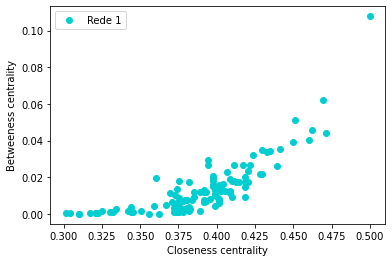

In [ ]:
#Rede 1
GraficoCentralidade(G1_modif, color='darkturquoise', nome_rede='Rede 1')

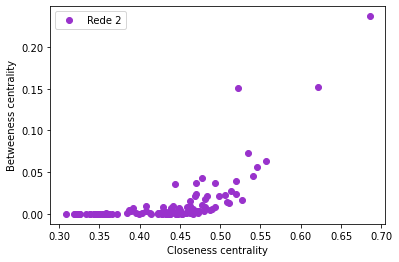

In [ ]:
#Rede 2
GraficoCentralidade(G2_modif, color='darkorchid', nome_rede='Rede 2')

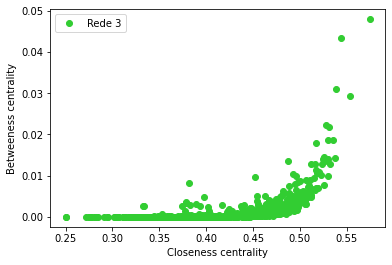

In [ ]:
#Rede 3
GraficoCentralidade(G3_modif, color='limegreen', nome_rede='Rede 3')

## b) Correlação entre medidas de centralidade

Como estamos tratando de dados quantitativos e contínuos, vamos usar a correlação de Pearson.

In [ ]:
#Calcula os resultados
closeness_G1, betweenness_G1 = CalculaCentralidade(G1_modif)
corr_G1 = st.pearsonr(list(closeness_G1.values()), list(betweenness_G1.values()))

closeness_G2, betweenness_G2 = CalculaCentralidade(G2_modif)
corr_G2 = st.pearsonr(list(closeness_G2.values()), list(betweenness_G2.values()))

closeness_G3, betweenness_G3 = CalculaCentralidade(G3_modif)
corr_G3 = st.pearsonr(list(closeness_G3.values()), list(betweenness_G3.values()))

#Mostra os valores
print('--- Rede 1 ---')
print('Correlação de Pearson: ', corr_G1[0])
print('p-valor: ', corr_G1[1])

print('--- Rede 2 ---')
print('Correlação de Pearson: ', corr_G2[0])
print('p-valor: ', corr_G2[1])

print('--- Rede 1 ---')
print('Correlação de Pearson: ', corr_G3[0])
print('p-valor: ', corr_G3[1])

--- Rede 1 ---
Correlação de Pearson:  0.7946310608422936
p-valor:  1.1032204788277925e-26
--- Rede 2 ---
Correlação de Pearson:  0.6397279526161472
p-valor:  4.817730888879976e-15
--- Rede 1 ---
Correlação de Pearson:  0.49388955980047605
p-valor:  4.171104809026765e-48


Dos gráficos da questão 2. a), podemos ver que há uma dependência linear entre as centralidades closeness e betweenness para a rede 1, que toma uma forma mais próxima da exponencial no caso das outras duas redes.

## c) Vértices com alta relevância

Uma forma de definir relevância é através do conceito de centralidade. Um nó será mais relevante quanto maior for a centralidade considerada.

Abaixo, estão gráficos de centralidade *degree*, *betweenneess* e *closeness* para cada uma das redes, com nós de cores mais quentes (tendendo para o amarelo) sendo os com maiores valores de centralidade.

In [ ]:
def GraficaPorCentralidade(rede):
  '''
  Esta função permite fazer o gráfico através dos valores de centralidade calculados
  para uma dada rede, com valores de centralidade variáveis sendo indicados por cores
  (mais central: cores mais quentes).
  '''
  
  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))

  #calcula as centralidades
  dcent = nx.degree_centrality(rede)
  bcent = nx.betweenness_centrality(rede)
  ccent = nx.closeness_centrality(rede)  

  #cria as cores para cada tipo de cálculo de centralidade
  color1 = [dcent[i] for i in range(len(dcent))]
  color2 = [bcent[i] for i in range(len(bcent))]
  color3 = [ccent[i] for i in range(len(ccent))]

  #Monta os gráficos
  pos=nx.spring_layout(rede)
  
  nx.draw(rede, pos, with_labels=False, node_size=50, node_color=color1, width=0.05, ax=ax1)
  ax1.set_axis_on() # turns on axis, bugfix 
  ax1.set_xlabel('Degree centrality')

  nx.draw(rede, pos, with_labels=False, node_size=50, node_color=color2, width=0.05, ax=ax2)
  ax2.set_axis_on() # turns on axis, bugfix
  ax2.set_xlabel('Betweenness centrality')

  nx.draw(rede, pos, with_labels=False, node_size=50, node_color=color3, width=0.05, ax=ax3)
  ax3.set_axis_on() # turns on axis, bugfix
  ax3.set_xlabel('Closeness centrality')

  fig.tight_layout()

  plt.show()

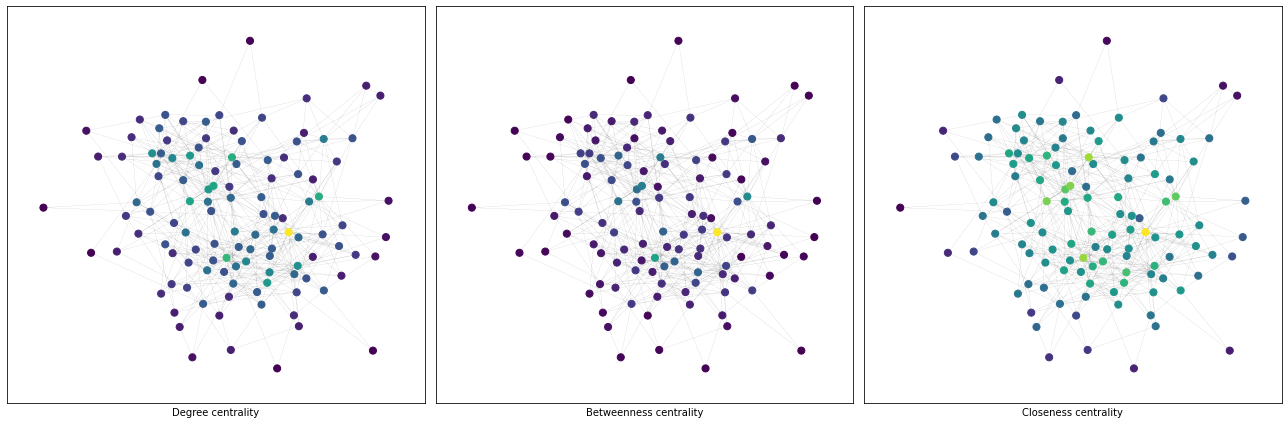

In [ ]:
#Rede 1
GraficaPorCentralidade(G1_modif)

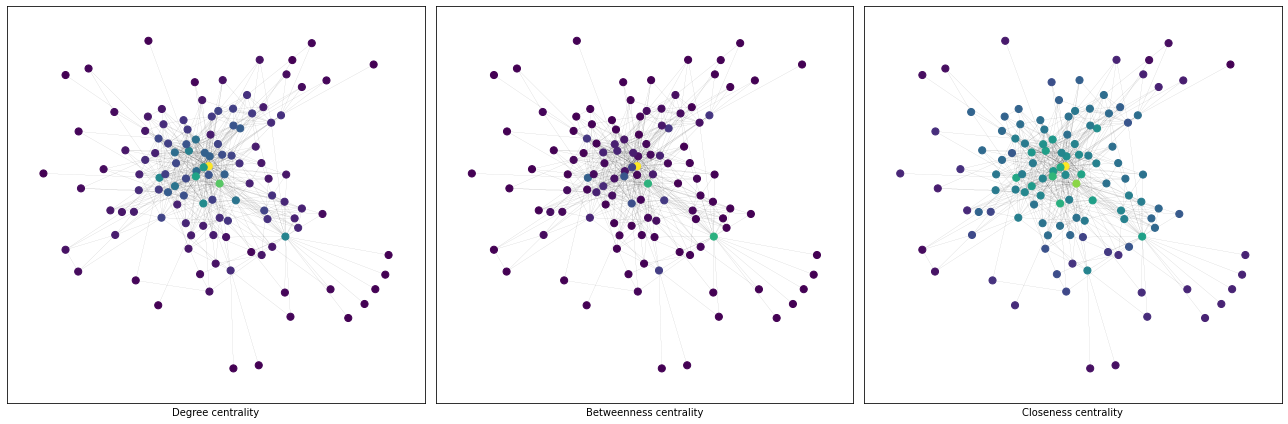

In [ ]:
#Rede 2
GraficaPorCentralidade(G2_modif)

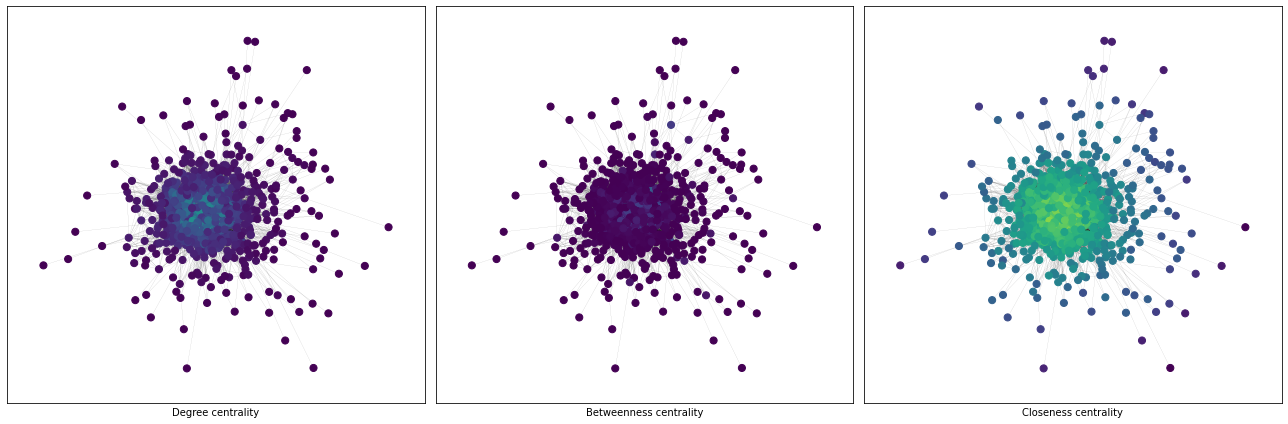

In [ ]:
#Rede 3
GraficaPorCentralidade(G3_modif)

Ao observar estes gráficos e comparar com as comunidades mostradas em Q1. a)-b), temos que os nós mais relevantes (de maior centralidade) estão também concentrados nas maiores comunidades. Dado que a centralidade foi calculada de forma global, isto é, para todos os nós e não especificamente para certas comunidades, não podemos afirmar que eles deixam de se destacam globalmente.

# Q3: Ataque

## a) Removendo arestas

In [ ]:
def removing(H):
    G = H.copy()
    G2 = nx.Graph()
    N0 = len(G)
    while(len(G.edges) > int(0.7*N0)):
        edge = random.choice(list(G.edges))            
        G.remove_edge(edge[0],edge[1]) 
        G2.add_edge(edge[0],edge[1])
    return G, G2

In [ ]:
def cosine_similarity(matrix):
  save = []
  for i in range(len(matrix)):
    pre_save = []
    for j in range(len(matrix)):
      lista = []
      t = []
      s = []
      for k in range(len(matrix)):
        lista.append(matrix[i][k]*matrix[k][j])
        t.append(matrix[i][k]**2)
        s.append(matrix[k][j]**2)
      pre_save.append(sum(lista)/(np.sqrt(sum(t))*np.sqrt(sum(s))))
    save.append(pre_save)
  return save

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [ ]:
def acerto(G):
  G_, G2 = removing(G)
  N = G.number_of_nodes()
  lista = []
  for i in range(N):
    for j in range(N):
      if i == j:
        pass
      else:
        lista.append((i,j))

  G_matrix = nx.adjacency_matrix(G_).toarray()

  G5 = nx.Graph(lista)
  G5_matrix = nx.adjacency_matrix(G5).toarray()
  
  difference_matrix = G5_matrix-G_matrix
  teste = cosine_similarity(difference_matrix)
  
  # sA = sparse.csr_matrix(teste)
  matriz_sort = np.argsort(teste) 
  matriz_sort2 = []
  for i in range(int(0.7*N), N):
    matriz_sort2.append(column(matriz_sort,i))
  matriz_sort2 = np.transpose(matriz_sort2)

  novo = []
  for i in range(len(matriz_sort2)):
    for j in range(len(matriz_sort2[0])):
      novo.append((i,matriz_sort2[i][j]))

  G_novo = nx.Graph(novo)
  preds = nx.jaccard_coefficient(G_novo)
  jaccards = []
  for u, v, p in preds:
      jaccards.append(p)

  return np.mean(jaccards)    

In [ ]:
for i in range(10):
  N = 100
  av_degree = 2
  p = av_degree/(N-1)
  G = nx.gnp_random_graph(N, p, seed=None, directed=False)
  print(acerto(G))

0.6029134680458006
0.5661809856703786
0.6472696064715113
0.6122237672626214
0.6382505282518076
0.6908030428757772
0.586191547573825
0.5038326820802234
0.6686867753022503
0.6950632712607863


In [ ]:
print("Rede 1")
m1 = []
m2 = []
m3 = []
for i in range(10):
  m1.append(acerto(G1_modif))
print("Taxa de acerto rede 1:", np.mean(m1), '\n')
print("Rede 2")
for i in range(10):
  m2.append(acerto(G2_modif))
print("Taxa de acerto rede 2:", np.mean(m2), '\n')

print("Rede 3")
for j in range(10):
  m3.append(acerto(G3_modif))
print("Taxa de acerto rede 3:", np.mean(m3))

Rede 1
Taxa de acerto rede 1: 0.6749981053155956 

Rede 2
Taxa de acerto rede 2: 0.5637923518408056 

Rede 3
Taxa de acerto rede 3: 0.7669839474094842


Nesse caso foi primeiramente removido aleatoriamente 30% das arestas e em seguida foi calculada a similaridade por cosseno para todos os pares de arestas não ligados, com isso pegamos os 30% maiores valores e usamos a medida de Jaccard para obter a correspondência entre a rede com 30% menos arestas. Como o coeficiente de Jaccard calcula a similaridade e a diversidade entre duas amostras, sendo assim, ele calcula a probabilidade que os nós analisados tem uma característica em comum, para isso ele utiliza a intersecção dos vizinhos entre os dois nós sobre a união desses vizinhos, resultando em um valor entre 0 e 1.

Com isso, podemos ver que entre as redes analisadas, o maior coeficiente é da rede 3, pois representa uma rede com um aglomerado de nós muito grande, resultando uma grande similaridade entre eles.



## b) Eficiência na previsão de links

Utilizando o método da questão anterior podemos tentar prever possíveis links em nossas redes, como explicado anteriormente o processo implica em uma taxa de acerto do coeficiente Jaccard, que resulta na probabilidade em que dois nós tem uma característica em comum, com isso, podemos prever possíveis links em nossas redes.

Em uma rede com comunidades essa predição tende a ser mais eficiente, pois o nosso coeficiente tende a ser mais alto, uma vez que o nós que fazem parte da mesma comunidade compartilham, a intersecção entre eles aumenta.

Isso pode resultar em uma eficiência computacional maior da seguinte forma: em uma rede de comunidades os clusters que se formam possuem um grande número de vizinhos ligados e com isso no momento de calcular a similaridade por cosseno entre os vértices não ligados, esse número de vértices será menor, com isso já reduzimos um pouco a nossa complexidade. Outro momento que essa complexidade será reduzida é em toda cadeia resultante desse número menor de vértices utilizados, seja na hora de calcular o Jaccard ou na hora de ordenar os valores.

https://www.cs.cornell.edu/home/kleinber/link-pred.pdf

# Q4: Detecção de comunidades e particionamento

## a) Minimização do *cut size*

Quando se trata de comparar bissecção em grafos, é necessário levar em consideração que a rede nesse caso será partida apenas em duas outras, definindo a melhor divisão possível que separa a rede em duas de tamanho igual e temos que o número de links entre os grupos é minimizado. Já para o caso de separação por comunidades, aqui o tamanho e o número de grupos não é definido previamente, mas sim definido pelas propriedades da rede, sendo assim, esse método cobre todos os tipos de redes com diferentes propriedades.

Exemplo de rede utilizando detecção de comunidadas:

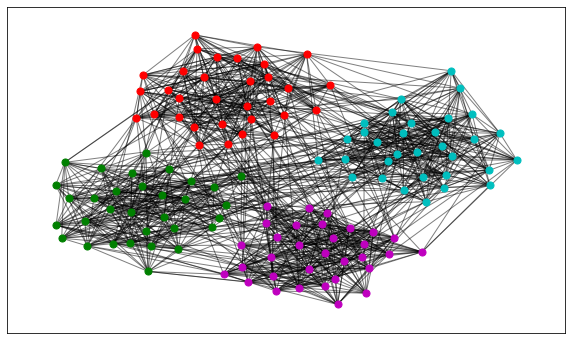

In [ ]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.13
k =16
minc = 32
maxc = 32
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
G.remove_edges_from(nx.selfloop_edges(G))
pos=nx.spring_layout(G)
partition = community_louvain.best_partition(G)
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

Exemplo de rede minimzando o *cut size*

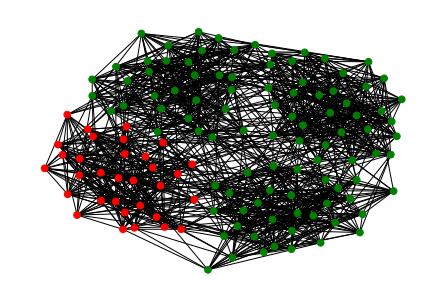

In [ ]:
split = nx.algorithms.community.centrality.girvan_newman(G)
split_tuple = tuple(sorted(c) for c in next(split))
color_list = ['r' if node in split_tuple[0] else 'g' for node in G.nodes]
nx.draw_kamada_kawai(G, node_color = color_list, node_size = 45)

Usando a rede Zachary's karate club

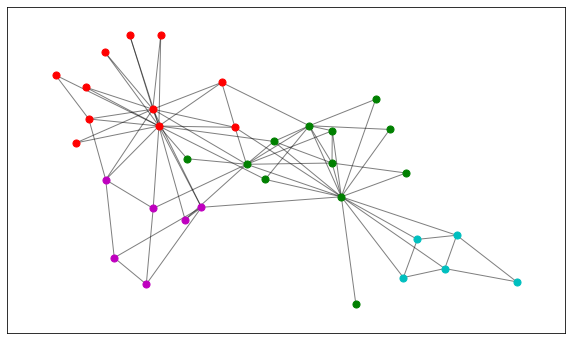

In [ ]:
G = G_zac
G.remove_edges_from(nx.selfloop_edges(G_zac))
pos=nx.spring_layout(G_zac)
partition = community_louvain.best_partition(G)
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partition.values())))
count = 0
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

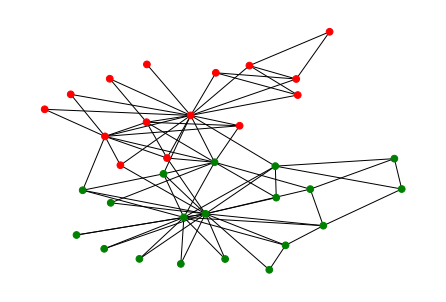

In [ ]:
split = nx.algorithms.community.centrality.girvan_newman(G)
split_tuple = tuple(sorted(c) for c in next(split))
color_list = ['r' if node in split_tuple[0] else 'g' for node in G.nodes]
nx.draw_kamada_kawai(G, node_color = color_list, node_size = 45)

## b) Método Kerninghan-Lin

A implementação deste método está feita no NetworkX através da função `kernighan_lin_bisection()`. Vamos então aplicá-la na rede do clube de karatê.

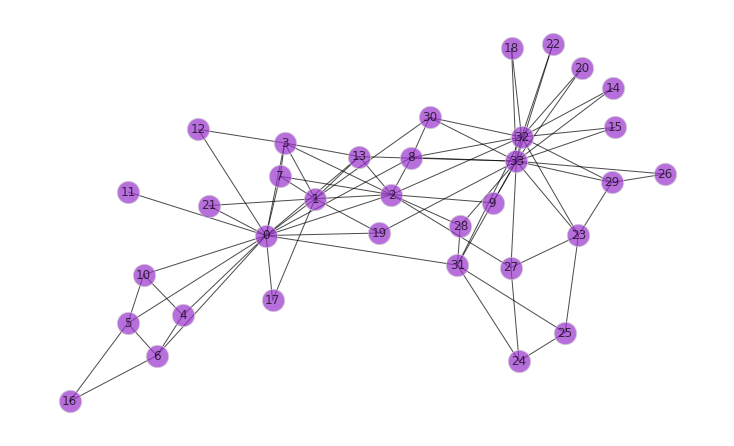

In [ ]:
#Grafica outra vez a representação gráfica do grafo G_zac, para referência.
#--->Importante: nessa questão, vamos utilizar a versão não modificada (G_zac) desta rede.

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G_zac)
nx.draw(G_zac, pos, node_color="darkorchid", node_size=500, with_labels=True, edgecolors= 'lightgray', alpha=0.7)

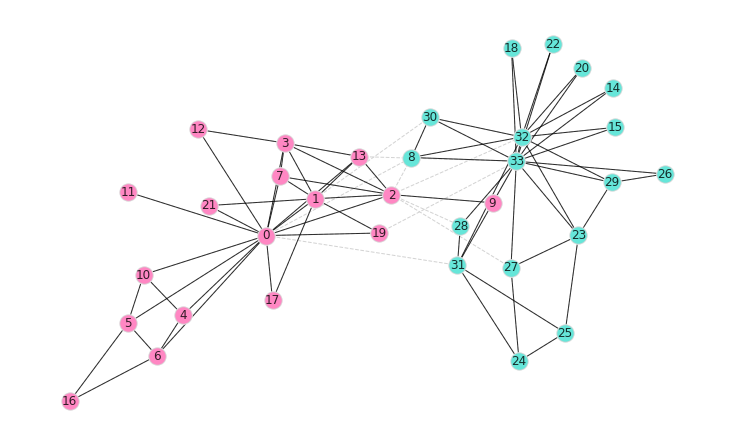

In [ ]:
#Faz a bisseção
comms_zac = []
comms_zac = nx.algorithms.community.kernighan_lin_bisection(G_zac, partition=None, max_iter=10, weight='weight', seed=None)

colors = ['hotpink', 'turquoise']   #cores que cada comunidade deve assumir

fig= plt.figure(figsize=(10,6))
nx.draw(G_zac, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in comms_zac:
    nx.draw(G_zac.subgraph(cm), pos=pos, node_color = colors[aux], 
                    with_labels = True, node_size=300, font_color = 'black', edgecolors='lightgray', alpha=0.8)
    aux = aux + 1
plt.show(True)